<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/distillationoilgas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Distillation
#@markdown Introduction to distillation in oil and gas processing 
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

     |████████████████████████████████| 66.1MB 64kB/s 
     |████████████████████████████████| 460kB 37.5MB/s 


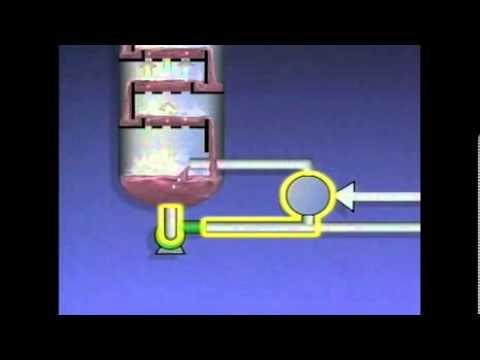

In [2]:
#@title  Oil and gas distillation
#@markdown Introduction to Oil and gas distillation
from IPython.display import YouTubeVideo
YouTubeVideo('gYnGgre83CI', width=600, height=400)

#Simulation of a distillation process using NeqSim
In the following example we will illustrate the distillation of a water-ethanol mixture using NeqSim.

In [17]:
from neqsim.thermo import fluid
from neqsim.process import clearProcess, stream, runProcess, valve
from neqsim.thermo.thermoTools import *
import pandas as pd
# Create a gas-condensate fluid
wateretoh = {'ComponentName':  ['methane', 'water', "MEG"], 
        'MolarComposition[-]':  [0.02, 0.48, 0.5]
} 

gascondensatedf = pd.DataFrame(wateretoh) 
print("Fluid:\n")
print(gascondensatedf.head(30).to_string())
aqueousFluid = fluid_df(gascondensatedf, lastIsPlusFraction=False).autoSelectModel()

Fluid:

  ComponentName  MolarComposition[-]
0       methane                 0.02
1         water                 0.48
2           MEG                 0.50


In [18]:
feedStream = stream(aqueousFluid)
feedStream.setFlowRate(1000.0, 'kg/day')
feedStream.setPressure(1.1, 'bara')
feedStream.setTemperature(90.0, 'C')
feedStream.run()
printFrame(feedStream.getFluid())

                                                     ()                 (t, o, t, a, l)                                                     (g, a, s)                                         (a, q, u, e, o, u, s)  ()  ()                                             ()
                                  (m, e, t, h, a, n, e)                    (2, E, -, 2)                                (6, ., 9, 5, 0, 7, 1, E, -, 1)                                   (5, ., 7, 6, 0, 3, E, -, 5)  ()  ()  ([, m, o, l, e,  , f, r, a, c, t, i, o, n, ])
                                        (w, a, t, e, r)              (4, ., 8, E, -, 1)                                (2, ., 9, 8, 8, 3, 7, E, -, 1)                                (4, ., 8, 5, 3, 5, 2, E, -, 1)  ()  ()  ([, m, o, l, e,  , f, r, a, c, t, i, o, n, ])
                                              (M, E, G)                    (5, E, -, 1)                                (6, ., 0, 9, 2, 1, 1, E, -, 3)                                (5, ., 1, 4, 5, 9,